In [1]:
%conda install scikit-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\hcodeur1\.conda\envs\formation

  added / updated specs:
    - scikit-learn


The following NEW packages will be INSTALLED:

  joblib             pkgs/main/win-32::joblib-0.13.2-py37_0
  scikit-learn       pkgs/main/win-32::scikit-learn-0.21.1-py37h6288b17_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda




In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn


In [5]:
#food = pd.read_csv('fr.openfoodfacts.org.products.csv', sep="\t", nrows=200000)
food = pd.read_csv("data/openfoodfacts_short.csv")

food = food.loc[food['allergens'].dropna().index]

cols = (['allergens', 'product_name']
        + [col for col in food.columns
           if (("100g" in col)
               and not ("acid" in col)
               and not ("-fat" in col)
              )
          ][:10])
len(cols)
food = food[cols].copy()

food['allergens'] = [s.lower().replace("en:", "").replace("es:", "")
                     for s in food['allergens']  if isinstance(s, str) ]

common_allergens = {
    'wheat': ("blé", "wheat", "ble", ),
    "milk": ('leche', 'lait', 'milk', 'milch'),
    "gluten": ("gluten", ),
    "nut": ("almond", "almendra", "nut", "noisettes", "amandes"),
    "soy": ("soja", "soy"),
    "egg": ('egg', 'œuf', 'oeuf', 'huevo')
}



for key, trans in common_allergens.items():
    food["has_"+key] = [np.any([t in allergens for t in trans])
                 for allergens in food['allergens']]


food = food.dropna(axis=1, how="all").fillna(0.0)
food = food.drop(columns=["energy_100g"])#, "cholesterol_100g", "lactose_100g"])


data_cols = [col for col in food.columns if "100g" in col]
allergy_cols = [col for col in food.columns if "has_" in col]
food.shape



(162, 14)

In [6]:
food.head()

,allergens,product_name,fat_100g,sugars_100g,carbohydrates_100g,fiber_100g,proteins_100g,potassium_100g,has_wheat,has_milk,has_gluten,has_nut,has_soy,has_egg
13,"eggs,mustard",Solène céréales poulet,5.9,1.7,30.3,2.8,9.7,0.0,False,False,False,False,False,True
27,"blé, gluten, ble, fromage, lait, lait, lait, l...",Baguette Poitevin,6.7,0.6,27.5,1.7,8.9,0.0,True,True,True,False,False,False
36,"blé, seigle, blé, seigle, saumon, fromage",Suedois saumon,4.4,4.6,23.3,2.7,8.4,0.0,True,False,False,False,False,False
46,fromage,Fromage blanc à la creme de marron,5.9,17.4,18.6,0.6,5.1,0.0,False,False,False,False,False,False
51,"blé, gluten, ble, ble, orge, blé, sésame, seigle",Sandwich solene céréales sicilien,6.2,1.7,30.0,3.1,8.1,0.0,True,False,True,False,False,False


In [7]:
food["total_alergies"] = food[allergy_cols].sum(axis=1)

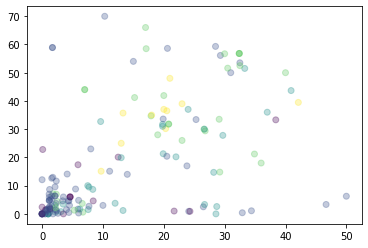

In [8]:
fig, ax = plt.subplots()

ax.scatter(food.fat_100g, food.sugars_100g,
           c=food.total_alergies, alpha=0.3)

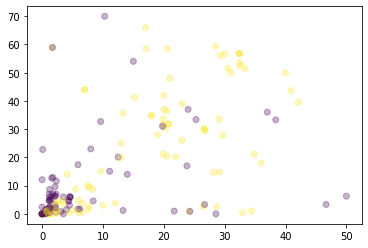

In [9]:
fig, ax = plt.subplots()

ax.scatter(food.fat_100g, 
           food.sugars_100g,
           c=food.has_milk, alpha=0.3)

In [10]:
food["total_alergies"].max()

4

In [11]:
from sklearn.decomposition import PCA


X = food[data_cols].clip(0, 100)
y = food["total_alergies"]

pca = PCA(n_components=2)
X_pca = pca.fit(X).transform(X)


X_pca = pca.fit_transform(X)
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))



explained variance ratio (first two components): [0.60391392 0.21082217]


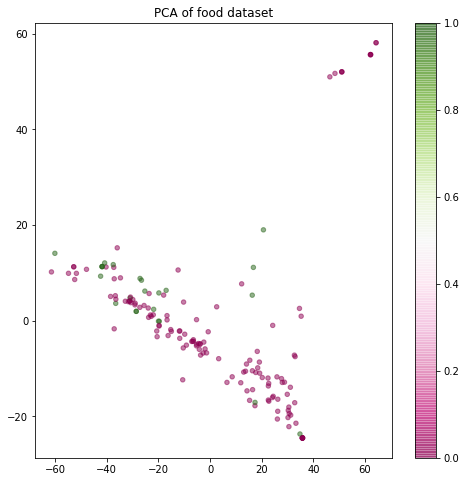

In [13]:

fig, ax = plt.subplots()
sc = ax.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=food["has_nut"],
    alpha=.5, s=20, cmap='PiYG'
)
fig.colorbar(sc)

ax.set_title('PCA of food dataset')
fig.set_size_inches(8, 8);



In [14]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=10).fit(X_pca)
kmeans.labels_





array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0])

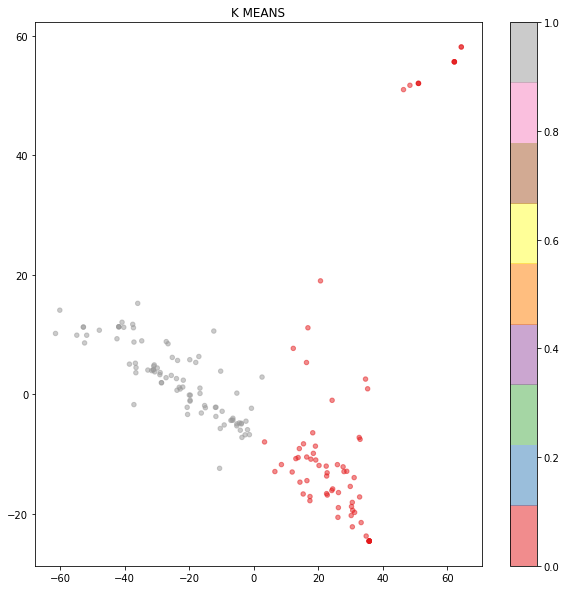

In [15]:
fig, ax = plt.subplots()
sc = ax.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=kmeans.labels_,
    alpha=.5, s=20, cmap='Set1'
)
fig.colorbar(sc)

ax.set_title('K MEANS')
fig.set_size_inches(10, 10);


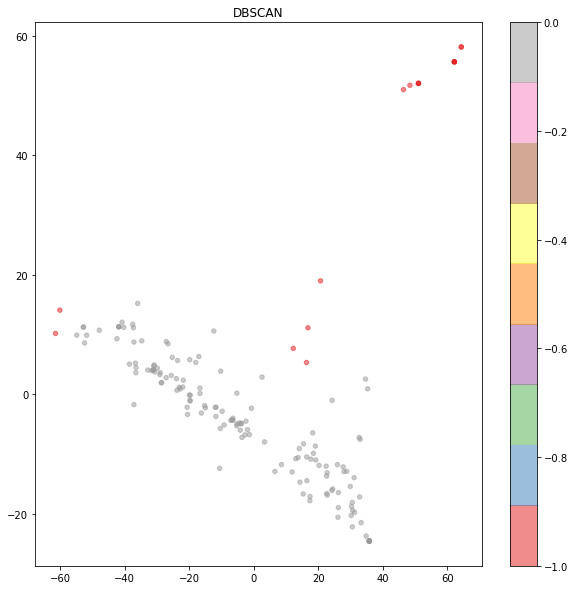

In [17]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=10, min_samples=10).fit(X_pca)

fig, ax = plt.subplots()
sc = ax.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=clustering.labels_,
    alpha=.5, s=20, cmap='Set1'
)
fig.colorbar(sc)

ax.set_title('DBSCAN')
fig.set_size_inches(10, 10);

In [198]:
food[clustering.labels_==7].shape

(118, 12)

Automatically created module for IPython interactive environment


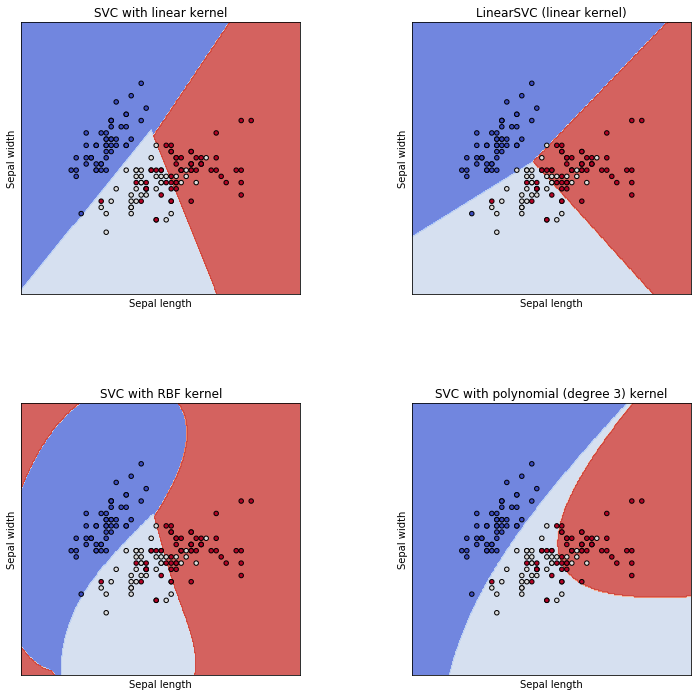

In [18]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

fig.set_size_inches(12, 12)